# GISAID Metadata - General Insights

In [23]:
import dask.dataframe as dd
import pandas as pd

gisaid_metadata = dd.read_csv('../../data/gisaid_metadata_preprocessed.csv')
gisaid_metadata = gisaid_metadata.compute()
gisaid_metadata.info()  # -> 21 columns: 15 string, 3 bool, 2 float & 1 integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6945225 entries, 0 to 51677
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   covv_accession_id          object 
 1   covv_clade                 object 
 2   covv_collection_date       object 
 3   covsurver_prot_mutations   object 
 4   covsurver_uniquemutlist    object 
 5   covv_orig_lab              object 
 6   covv_passage               object 
 7   covv_subm_lab              object 
 8   gc_content                 float64
 9   covv_host                  object 
 10  is_high_coverage           bool   
 11  is_reference               bool   
 12  is_complete                bool   
 13  covv_lineage               object 
 14  pangolin_lineages_version  object 
 15  covv_location              object 
 16  n_content                  float64
 17  sequence_length            int64  
 18  covv_subm_date             object 
 19  covv_type                  object 
 20  covv

In [ ]:
import os

if not os.path.isdir('../../plots/GISAID'):
    os.mkdir('../../plots/GISAID')

## Overview of Available Features

In [25]:
# Get statistics of categorical columns
gisaid_metadata.describe(include=['object', 'bool'])

# FINDINGS:
# covv_variant has 14 unique values
# sequencing reason/ keywords column don't exist but should (see GISAID upload or search area)

# QUESTIONS FOR FABIO:
# 1. Why does metadata by CovRadar API has different column names?
# 2. Can we include sequencing reason/ keywords and patient status?
# 3. Where to find official documentation of GISAID metadata?

,covv_accession_id,covv_clade,covv_collection_date,covsurver_prot_mutations,covsurver_uniquemutlist,covv_orig_lab,covv_passage,covv_subm_lab,covv_host,is_high_coverage,is_reference,is_complete,covv_lineage,pangolin_lineages_version,covv_location,covv_subm_date,covv_type,covv_variant
unique,6945225,11,870,3177940,152303,20425,324,4086,1,2,2,2,1578,1,26054,723,1,14
count,6945225,6945158,6945225,6945225,1642878,6945153,6945225,6945224,6945225,6945225,6945225,6945225,6945158,6945222,6945225,6945225,6945206,5734408
top,EPI_ISL_1000000,GK,2021,"(Spike_P681R,N_D63G,NS7a_V82A,NSP12_P323L,NSP1...","(NS7a_V82A,N_D63G)",Lighthouse Lab in Milton Keynes,Original,Wellcome Sanger Institute for the COVID-19 Gen...,Human,True,False,True,B.1.1.7,2022-01-05,Europe / United Kingdom / England,2021-11-17,betacoronavirus,VOC Delta GK/478K.V1 (B.1.617.2+AY.x) first de...
freq,1,3862210,58872,34659,407363,385133,6899356,1200964,6945225,4848328,6945224,6839717,1116179,6945222,1382051,68511,6945206,3992087


In [26]:
# Get statistics of numeric columns
gisaid_metadata.describe(include=['float64', 'int64'])

,gc_content,n_content,sequence_length
count,6.945225e+06,6.945225e+06,6.945225e+06
mean,3.794622e-01,1.353829e-02,2.942621e+04
std,2.074926e-03,3.736357e-02,3.023512e+03
min,1.449275e-01,0.000000e+00,6.400000e+01
25%,3.795258e-01,0.000000e+00,2.976800e+04
50%,3.797201e-01,5.400510e-03,2.979900e+04
75%,3.800570e-01,5.040092e-02,2.984200e+04
max,5.357143e-01,9.977176e-01,3.469200e+04


In [2]:
# Get value counts of virus variants
gisaid_metadata['covv_variant'].value_counts()

# structure: VOI/VOC/VUM <WHO_label> <GISAID_clade> (<Pango_lineage>) first detected in <location>

# -> VOI = Variant of Interest
# -> VOC = Variant of Concern (Alpha, Beta, Gamma, Delta, Omicron)
# -> VUM = Variant under Monitoring (virus variants, have no WHO label)

VOC Delta GK/478K.V1 (B.1.617.2+AY.x) first detected in India                         3993832
VOC Alpha 202012/01 GRY (B.1.1.7+Q.x) first detected in the UK                        1145975
VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa     276235
VOC Gamma GR/501Y.V3 (P.1+P.1.x) first detected in Brazil/Japan                        120130
VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California               68180
VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York                            42912
VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa        41006
VOI Mu GH (B.1.621+B.1.621.1) first detected in Colombia                                14774
VOI Lambda GR/452Q.V1 (C.37+C.37.1) first detected in Peru                               9575
VOI Eta G/484K.V3 (B.1.525) first detected in UK/Nigeria                                 9424
VOI Kappa G/452R.V3 (B.1.617.1) first detected in India     

In [26]:
gisaid_metadata['country'].value_counts()

USA                2239106
United Kingdom     1694287
Germany             331042
Denmark             297101
Canada              240352
                    ...   
Chad                     9
Solomon Islands          6
Sint Eustatius           4
Palau                    2
Vanuatu                  2
Name: country, Length: 206, dtype: int64

## Scaled Number of Samples per Country

Bar plot with sample count per country scaled by #inhabitants.

In [2]:
plotdata = gisaid_metadata.copy(deep=True)

In [3]:
import json

with open('../helper_dicts/country_inhabitants.json') as f:
    country_inhabitants_map = json.load(f)

# Reduce 206 countries to 102 countries known in map
plotdata = plotdata[plotdata['country'].isin(list(country_inhabitants_map.keys()))]
plotdata['country'].nunique()

102

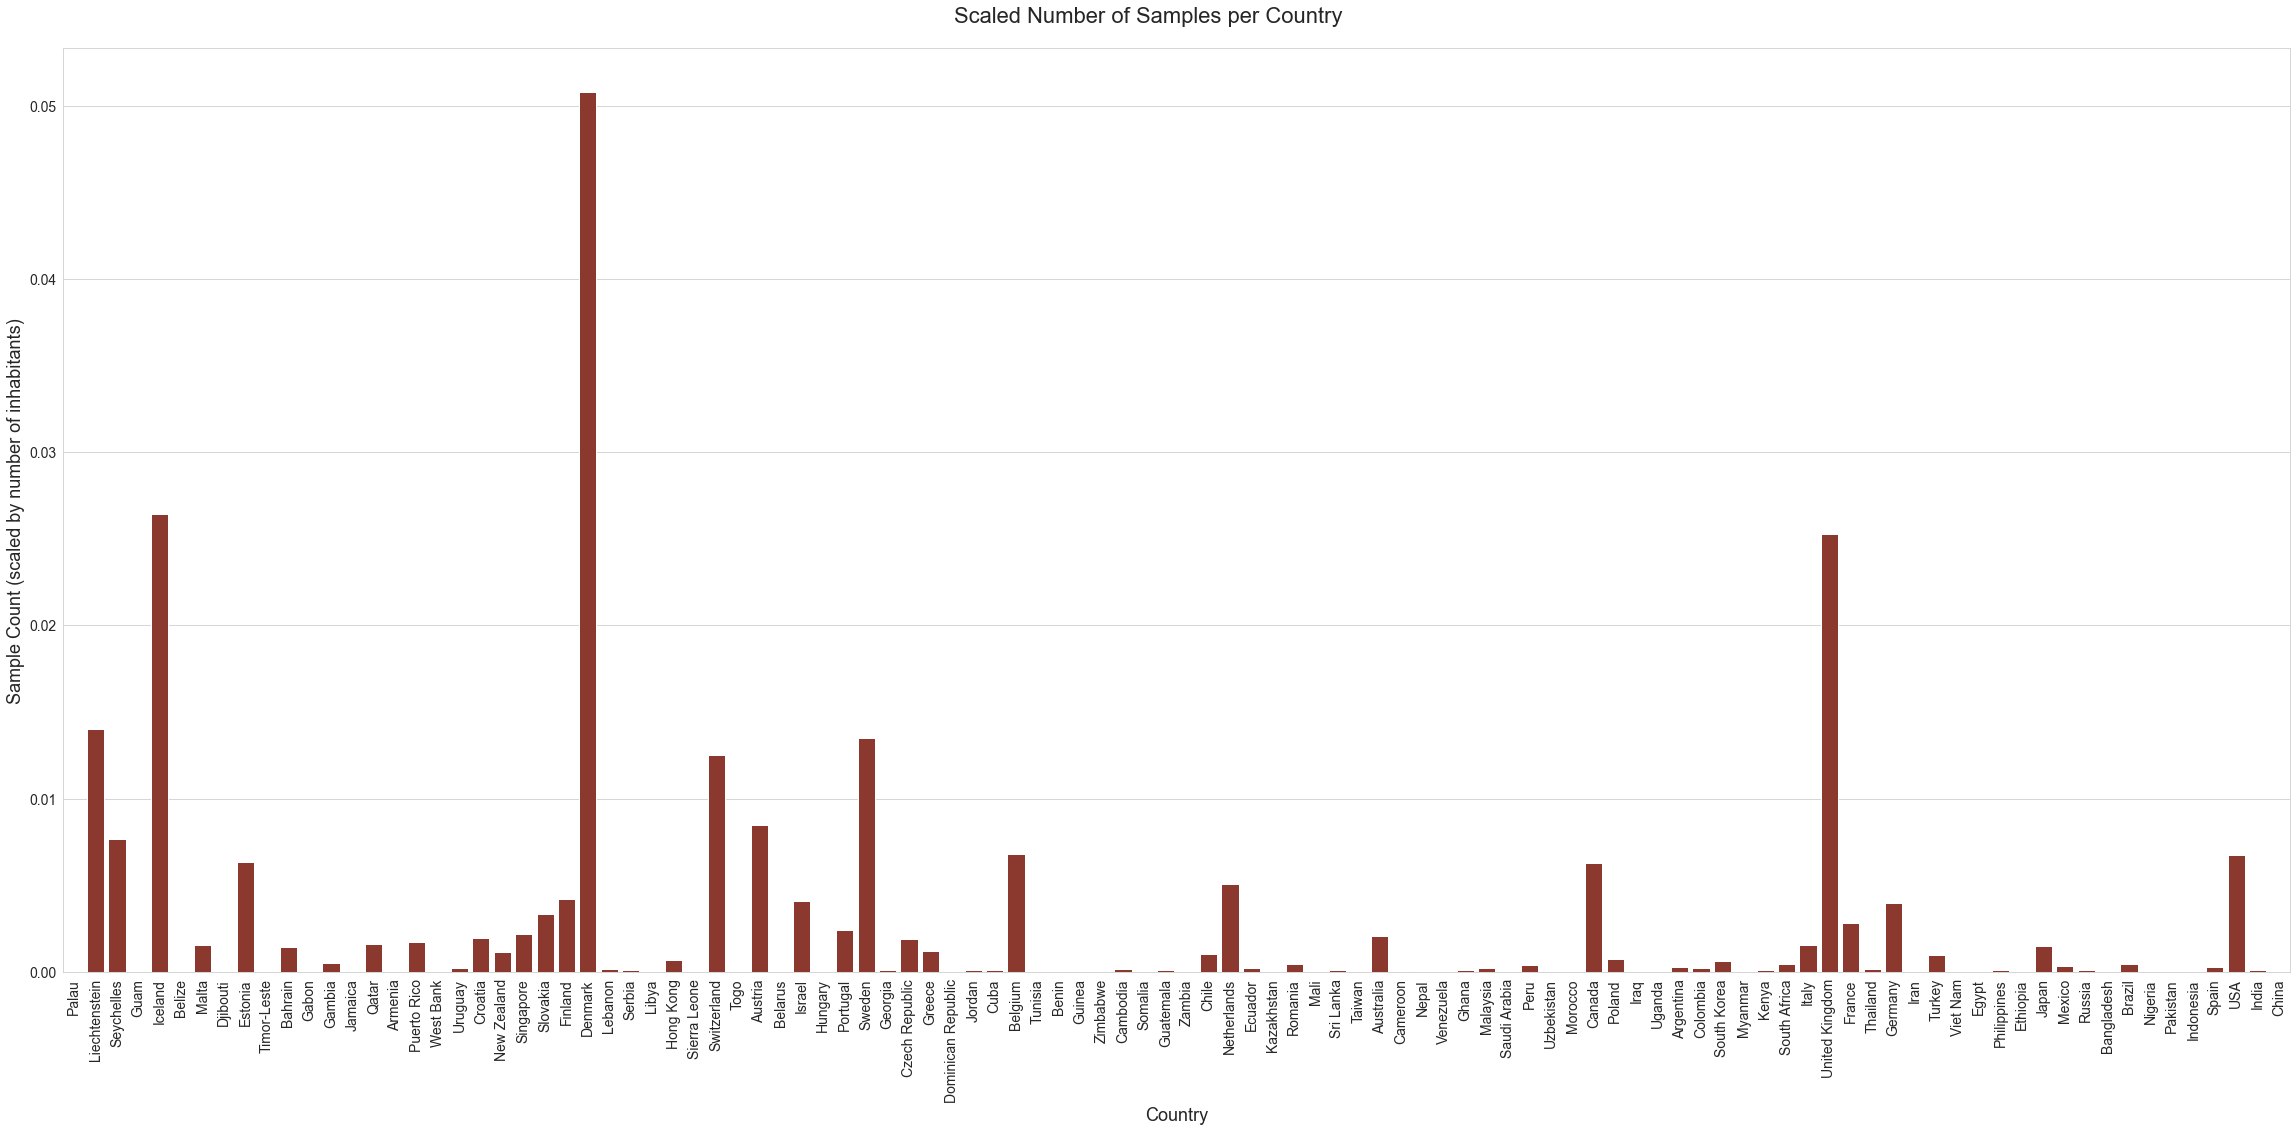

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort map by number of inhabitants + avoid plotting bar for "unknown" entry
country_inhabitants_map_sorted = list(country_inhabitants_map.items())
country_inhabitants_map_sorted.sort(key=lambda pair: pair[1])
country_inhabitants_map_sorted.remove(('Unknown', 0))

# Only take countries with at least 500 samples
plotdata_reduced = plotdata[plotdata['country'].map(plotdata['country'].value_counts()) >= 500]

# Create barplot with sample count per country
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(32, 16))
sns.countplot(data=plotdata_reduced,
              x='country',
              color='#9B2D1F',  # set custom red
              order=list(zip(*country_inhabitants_map_sorted))[0])  # get sorted countries

fig.suptitle('Scaled Number of Samples per Country\n', fontsize=22)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Sample Count (scaled by number of inhabitants)', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Scale height of bars with number of inhabitants per country
max_y = 0
for i, bar in enumerate(ax.patches):
    country = ax.get_xticklabels()[i].get_text()
    new_height = bar.get_height() / country_inhabitants_map[country]
    bar.set_height(new_height)

    max_y = max(max_y, new_height)
plt.gca().set_ylim([0, max_y + (max_y / 20)])

plt.tight_layout()
plt.savefig('../../plots/GISAID/country_counts_scaled_by_nr_inhabitants.png', dpi=300)
plt.close()

## Scaled Count of Virus Variants per Country

Multi-bar plot with countries on x-axis, virus variants as hue and #variant/#samples on y-axis.

In [6]:
plotdata = gisaid_metadata.copy(deep=True)

In [7]:
# Prepare helper data for plots
country_counts = pd.DataFrame(plotdata['country'].value_counts().sort_index().reset_index())
country_counts.rename(columns={'index': 'country', 'country': 'count'}, inplace=True)
country_counts

,country,count
0,Afghanistan,99
1,Albania,40
2,Algeria,85
3,Andorra,50
4,Angola,1056
...,...,...
201,Venezuela,229
202,Vietnam,2195
203,Wallis and Futuna Islands,10
204,Zambia,1140


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust which countries and variants to include
COUNTRIES = ['USA', 'United Kingdom', 'Germany', 'Denmark', 'Canada']
VARIANT_TYPE = 'VOC'
VARIANTS = plotdata['variant_WHO_label'].unique()

plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]
plotdata_reduced['covv_variant'] = plotdata_reduced['covv_variant'].astype(str)
plotdata_reduced = plotdata_reduced[(plotdata_reduced['covv_variant'].str.contains(VARIANT_TYPE)) & (plotdata_reduced['variant_WHO_label'].isin(VARIANTS))]

# Create multi-bar countplot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(22, 16))
sns.countplot(data=plotdata_reduced,
              x='country',
              hue='variant_WHO_label',
              hue_order=sorted(plotdata_reduced['variant_WHO_label'].unique()),
              order=COUNTRIES)

fig.suptitle('Scaled Count of Virus Variants per Country\n', fontsize=22)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Count of Virus Variants (scaled by number of samples & inhabitants)', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', title='Virus Variant:', fontsize=14)
plt.rcParams['legend.title_fontsize'] = 14

# Scale height of bars with number of samples per country
max_y = 0
for i, bar in enumerate(ax.patches):
    country = ax.get_xticklabels()[i % len(COUNTRIES)].get_text()
    new_height = bar.get_height() / country_counts[country_counts['country'] == country]['count'].iloc[0]
    bar.set_height(new_height)

    max_y = max(max_y, new_height)
plt.gca().set_ylim([0, max_y + (max_y / 20)])

plt.tight_layout()
plt.savefig('../../plots/GISAID/virus_variant_counts_scaled_by_nr_sequences.png', dpi=300)
plt.close()

c:\users\ninai\onedrive\dokumente\studium\module\master\4. semester\accountability in ai\sampling bias\sampling-bias-cov19\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Variant Percentages Over Time

Multi-line time series plot with variant percentages (#variant/#samples) on y-axis, one line color per country and one marker per variant.

In [24]:
gisaid_metadata['covv_subm_date'] = pd.to_datetime(gisaid_metadata['covv_subm_date'])

In [37]:
country_date_counts = gisaid_metadata.groupby(['country', 'covv_subm_date']).size().reset_index()
country_date_counts.rename(columns={0 : 'samples'}, inplace=True)

country_variant_counts = gisaid_metadata.groupby(['country', 'covv_subm_date', 'variant_WHO_label']).size().reset_index()
country_variant_counts.rename(columns={0 : 'samples_per_variant'}, inplace=True)

plotdata = pd.merge(country_date_counts, country_variant_counts, on=['country', 'covv_subm_date'])
plotdata['relative_samples_per_variant'] = plotdata['samples_per_variant'] / plotdata['samples']
plotdata

# => SKIP TO PLOTTING CELL (= SKIP NEXT 6 CELLS) IF WEEKLY AGGREGATION IS NOT NEEDED

,country,covv_subm_date,samples,variant_WHO_label,samples_per_variant,relative_samples_per_variant
0,Afghanistan,2021-02-15,7,Unknown,7,1.000000
1,Afghanistan,2021-02-19,6,Unknown,6,1.000000
2,Afghanistan,2021-02-22,3,Unknown,3,1.000000
3,Afghanistan,2021-09-29,83,Alpha,55,0.662651
4,Afghanistan,2021-09-29,83,Delta,20,0.240964
...,...,...,...,...,...,...
32599,Zimbabwe,2021-11-27,4,Delta,3,0.750000
32600,Zimbabwe,2021-11-27,4,Unknown,1,0.250000
32601,Zimbabwe,2021-11-29,2,Delta,2,1.000000
32602,Zimbabwe,2022-01-11,165,Omicron,163,0.987879


In [38]:
from datetime import timedelta

start_date = gisaid_metadata['covv_subm_date'].min()
end_date = gisaid_metadata['covv_subm_date'].max()
delta = end_date - start_date

dates = [start_date + timedelta(days=i) for i in range(delta.days + 1)]

# Start on first Monday (first entry is Friday, thus remove first three entries)
dates = dates[3:]
dates

[Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-17 00:00:00'),
 Timestamp('2020-01-18 00:00:00'),
 Timestamp('2020-01-19 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-21 00:00:00'),
 Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-

In [39]:
# Get all Mondays (105 weeks)
week_starts = dates[::7]
week_starts

[Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-24 00:00:00'),
 Timestamp('2020-03-02 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-03-16 00:00:00'),
 Timestamp('2020-03-23 00:00:00'),
 Timestamp('2020-03-30 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-05-04 00:00:00'),
 Timestamp('2020-05-11 00:00:00'),
 Timestamp('2020-05-18 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-06-08 00:00:00'),
 Timestamp('2020-06-15 00:00:00'),
 Timestamp('2020-06-22 00:00:00'),
 Timestamp('2020-06-29 00:00:00'),
 Timestamp('2020-07-06 00:00:00'),
 Timestamp('2020-07-13 00:00:00'),
 Timestamp('2020-07-20 00:00:00'),
 Timestamp('2020-07-

In [40]:
# Map each Monday to all days belonging to same week
week_map = dict()
for i, week_start in enumerate(week_starts):
    week_map[week_start] = dates[(i*7) : (i*7) + 7]

week_map[week_starts[42]]

[Timestamp('2020-11-02 00:00:00'),
 Timestamp('2020-11-03 00:00:00'),
 Timestamp('2020-11-04 00:00:00'),
 Timestamp('2020-11-05 00:00:00'),
 Timestamp('2020-11-06 00:00:00'),
 Timestamp('2020-11-07 00:00:00'),
 Timestamp('2020-11-08 00:00:00')]

In [41]:
import itertools

country_variant_combis = list(itertools.product(plotdata['country'].unique(), plotdata['variant_WHO_label'].unique()))
country_variant_combis

[('Afghanistan', 'Unknown'),
 ('Afghanistan', 'Alpha'),
 ('Afghanistan', 'Delta'),
 ('Afghanistan', 'Iota'),
 ('Afghanistan', 'Eta'),
 ('Afghanistan', 'Omicron'),
 ('Afghanistan', 'Beta'),
 ('Afghanistan', 'Gamma'),
 ('Afghanistan', 'Kappa'),
 ('Afghanistan', 'Theta'),
 ('Afghanistan', 'Epsilon'),
 ('Afghanistan', 'Lambda'),
 ('Afghanistan', 'Zeta'),
 ('Afghanistan', 'Mu'),
 ('Afghanistan', 'B.1.640'),
 ('Albania', 'Unknown'),
 ('Albania', 'Alpha'),
 ('Albania', 'Delta'),
 ('Albania', 'Iota'),
 ('Albania', 'Eta'),
 ('Albania', 'Omicron'),
 ('Albania', 'Beta'),
 ('Albania', 'Gamma'),
 ('Albania', 'Kappa'),
 ('Albania', 'Theta'),
 ('Albania', 'Epsilon'),
 ('Albania', 'Lambda'),
 ('Albania', 'Zeta'),
 ('Albania', 'Mu'),
 ('Albania', 'B.1.640'),
 ('Algeria', 'Unknown'),
 ('Algeria', 'Alpha'),
 ('Algeria', 'Delta'),
 ('Algeria', 'Iota'),
 ('Algeria', 'Eta'),
 ('Algeria', 'Omicron'),
 ('Algeria', 'Beta'),
 ('Algeria', 'Gamma'),
 ('Algeria', 'Kappa'),
 ('Algeria', 'Theta'),
 ('Algeria', 'Epsi

In [42]:
# Create weekly plotdata holding summed relative sample count per week
weekly_plotdata = pd.DataFrame(columns=['country_variant', 'startday_of_week', 'relative_sample_count'])

# For each week, append all country-variant combinations
for week_start in week_starts:
    weekly_plotdata = weekly_plotdata.append(pd.DataFrame({'country_variant': country_variant_combis,
                                                           'startday_of_week': [week_start] * len(country_variant_combis)}))

weekly_plotdata

,country_variant,startday_of_week,relative_sample_count
0,"(Afghanistan, Unknown)",2020-01-13,NaN
1,"(Afghanistan, Alpha)",2020-01-13,NaN
2,"(Afghanistan, Delta)",2020-01-13,NaN
3,"(Afghanistan, Iota)",2020-01-13,NaN
4,"(Afghanistan, Eta)",2020-01-13,NaN
...,...,...,...
3085,"(Zimbabwe, Epsilon)",2022-01-10,NaN
3086,"(Zimbabwe, Lambda)",2022-01-10,NaN
3087,"(Zimbabwe, Zeta)",2022-01-10,NaN
3088,"(Zimbabwe, Mu)",2022-01-10,NaN


In [ ]:
def add_weekly_relative_sample_count(row):
    data = plotdata[(plotdata['country'] == row['country_variant'][0]) & (plotdata['variant_WHO_label'] == row['country_variant'][1])]
    week_data = data[data['covv_subm_date'].isin(week_map[row['startday_of_week']])]
    return week_data['relative_samples_per_variant'].sum()

# Add summed relative sample count per country-variant combination and week
weekly_plotdata['relative_sample_count'] = weekly_plotdata.apply(lambda row: add_weekly_relative_sample_count(row), axis=1)
weekly_plotdata

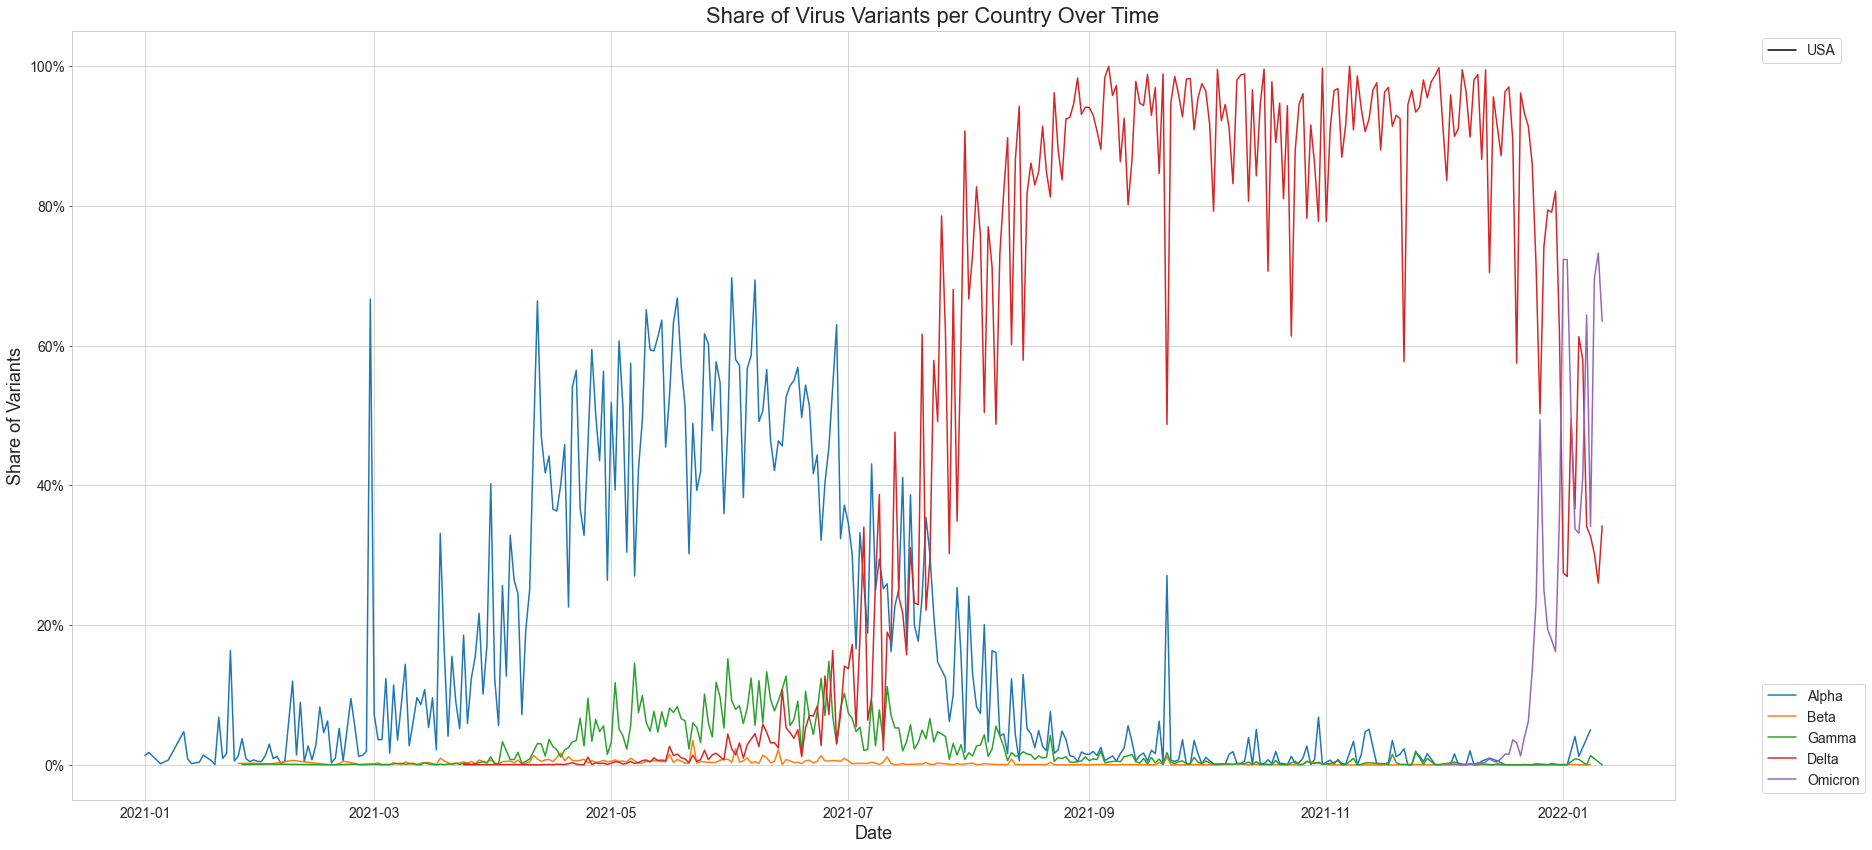

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

import os

# Adjust which countries and virus variants to include
COUNTRIES = ['USA']  # ['USA', 'United Kingdom', 'Germany', 'Denmark', 'Canada']
VARIANTS = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron']

# Aggregate counts for each week or not
WEEKLY = False

# Adjust which timeframe to look at
# If defined via dataframe, make sure to use correct one depending on WEEKLY flag
# plotdata['covv_subm_date'] for original values and weekly_plotdata['startday_of_week'] for weekly sum of values
START_DATE = '2021-01-01'
END_DATE = plotdata['covv_subm_date'].max()

if WEEKLY:
    plotdata_reduced = weekly_plotdata[(weekly_plotdata['startday_of_week'] >= START_DATE) & (weekly_plotdata['startday_of_week'] <= END_DATE)]
else:
    plotdata_reduced = plotdata[(plotdata['covv_subm_date'] >= START_DATE) & (plotdata['covv_subm_date'] <= END_DATE)]

# Define colors for virus variants
COLORS = sns.color_palette('tab10')
if len(VARIANTS) > len(COLORS):
    raise ValueError(f'Please define at most {len(COLORS)} variants!')

# Define line styles for countries
STYLES = ['solid', 'dashed', 'dotted']
if len(COUNTRIES) > len(STYLES):
    raise ValueError(f'Please define at most {len(STYLES)} countries!')

# Generate line per country-variant combination showing daily #variants/#samples over time
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(26, 12))
for country_idx, country in enumerate(COUNTRIES):
    for variant_idx, variant in enumerate(VARIANTS):
        if WEEKLY:
            current_plotdata = plotdata_reduced[plotdata_reduced['country_variant'] == tuple([country, variant])]
            ax.plot(current_plotdata['startday_of_week'], current_plotdata['relative_sample_count'], ls=STYLES[country_idx], color=COLORS[variant_idx])

        else:
            current_plotdata = plotdata_reduced[(plotdata_reduced['country'] == country) & (plotdata_reduced['variant_WHO_label'] == variant)].sort_values('covv_subm_date')
            ax.plot(current_plotdata['covv_subm_date'], current_plotdata['relative_samples_per_variant'], ls=STYLES[country_idx], color=COLORS[variant_idx])

# Add legend for countries
for country_idx, country in enumerate(COUNTRIES):
    ax.plot(np.nan, np.nan, ls=STYLES[country_idx], label=country, color='black')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=14)  # upper legend

# Add legend for virus variants
ax2 = ax.twinx()
for variant_idx, variant in enumerate(VARIANTS):
    ax2.plot(np.nan, np.nan, color=COLORS[variant_idx], label=variant)
ax2.get_yaxis().set_visible(False)
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0), fontsize=14)  # lower legend

# Adjust text
fig.suptitle(f'{"Weekly " if WEEKLY else ""}Share of Virus Variants per Country Over Time', fontsize=22)
ax.set_xlabel(f'{"Start Date of Week" if WEEKLY else "Date"}', fontsize=18)
ax.set_ylabel('Share of Variants', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

# Convert y-values ranging from 0 to 1 to percentages
yticks_percentages = mtick.PercentFormatter(xmax=1)
ax.yaxis.set_major_formatter(yticks_percentages)

# Create subdirectory if needed
if not os.path.isdir('../../plots/GISAID/variant_shares_over_time'):
    os.mkdir('../../plots/GISAID/variant_shares_over_time')

# Optimize layout and save plot
fig.tight_layout()
fig.savefig(f'../../plots/GISAID/variant_shares_over_time/variant_shares_over_time{"_weekly" if WEEKLY else ""}'
            f'#{"_".join(sorted(VARIANTS))}'
            f'#{"_".join(sorted(COUNTRIES))}'
            f'#{START_DATE if type(START_DATE) == str else str(START_DATE.date())}'
            f'#{END_DATE if type(END_DATE) == str else str(END_DATE.date())}.png', dpi=300)
plt.close()

# -> USA plot is meaningful: https://www.nytimes.com/interactive/2021/health/coronavirus-variant-tracker.html (see "Waves of Variants")

## Number of Samples Divided by Number of Infections Over Time

Per country, generate one time series plot with #samples/#infections over time.

In [ ]:
# TODO